In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('../data/raw/credit_default.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
5,6,50000,M,Graduate school,Single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,N
6,7,500000,M,Graduate school,Single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,N
7,8,100000,F,University,Single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,N
8,9,140000,F,High School,Married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,N
9,10,20000,M,High School,Single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,N


In [89]:
df.columns = df.columns.str.strip()
df['default'] = df['default'].map({'Y': 1, 'N': 0})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [91]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [92]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [93]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

# Section 2 - Exploratory Data Analysis (EDA)


In [ ]:
# Compute class distribution
df['default'].value_counts()
df['default'].value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

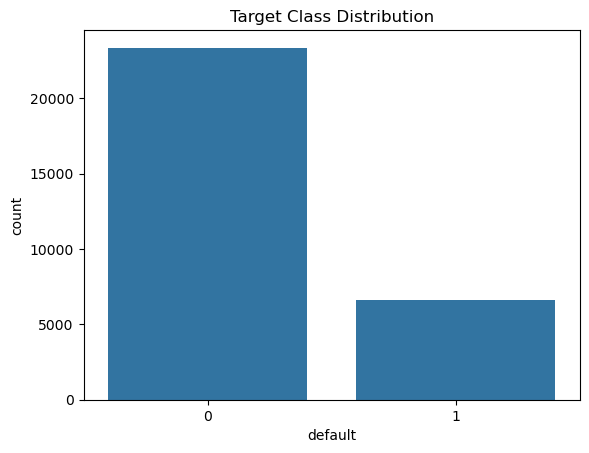

In [ ]:
# Plot the distribution of the target variable
sns.countplot(x='default', data=df)
plt.title('Target Class Distribution')
plt.show()

In [ ]:
# Check correlations with the target variable
df.corr(numeric_only=True)['default'].sort_values(ascending=False)

default      1.000000
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
AGE          0.013890
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
ID          -0.013952
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
Name: default, dtype: float64

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['ID', 'AGE'])
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Married,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,F,University,Single,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,F,University,Single,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,F,University,Married,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,M,University,Married,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# 2.1 - Examing Each Feature

In [101]:
# Separate features by type
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [102]:
# Numerical Features summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0


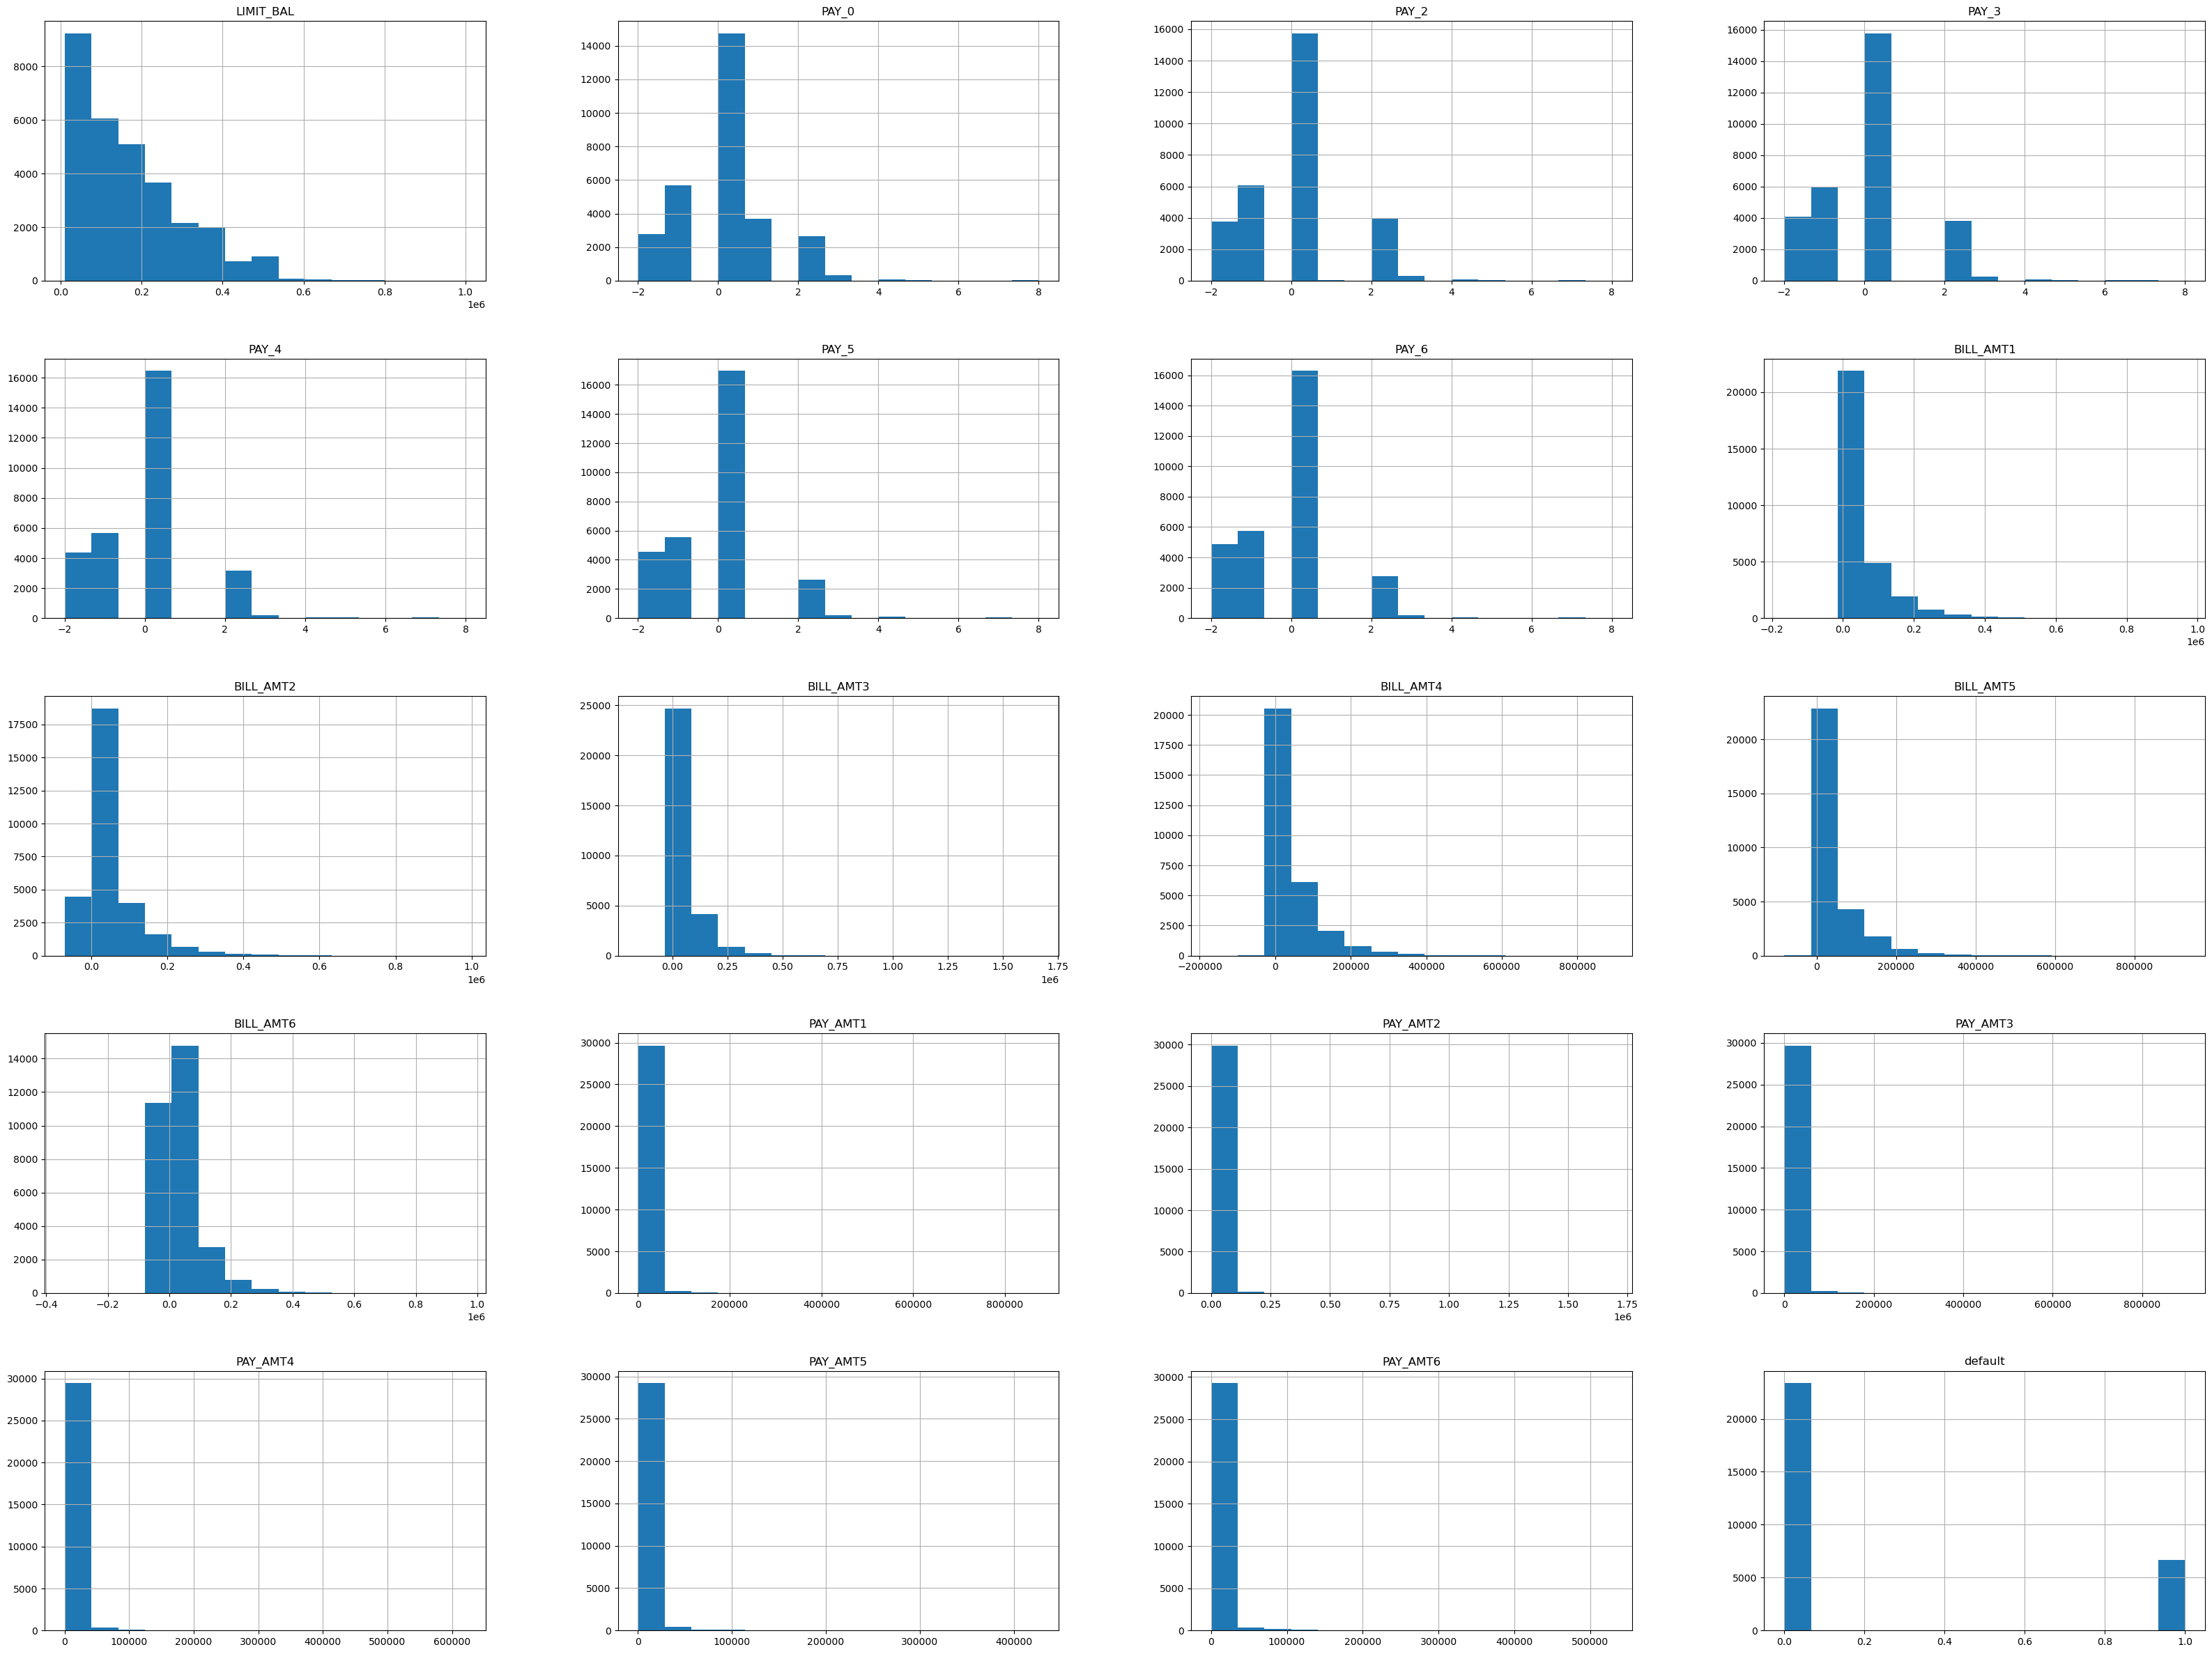

In [114]:
# Plot histograms for numerical features
df[num_cols].hist(bins=15, figsize=(40, 30))
plt.show()

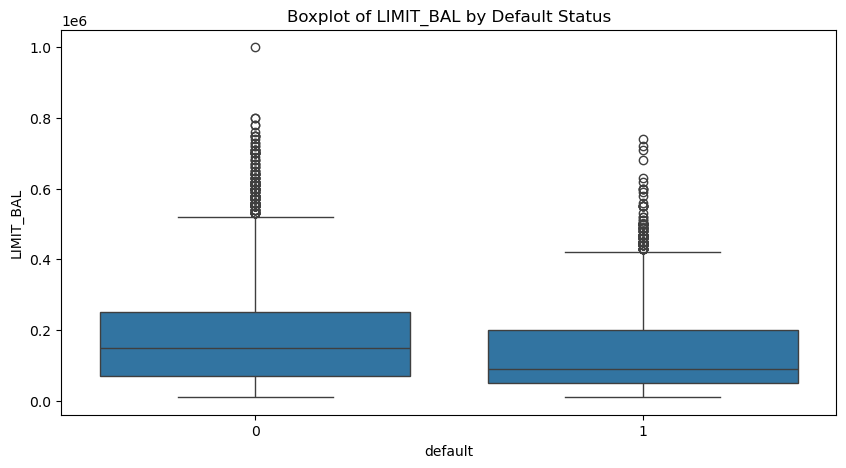

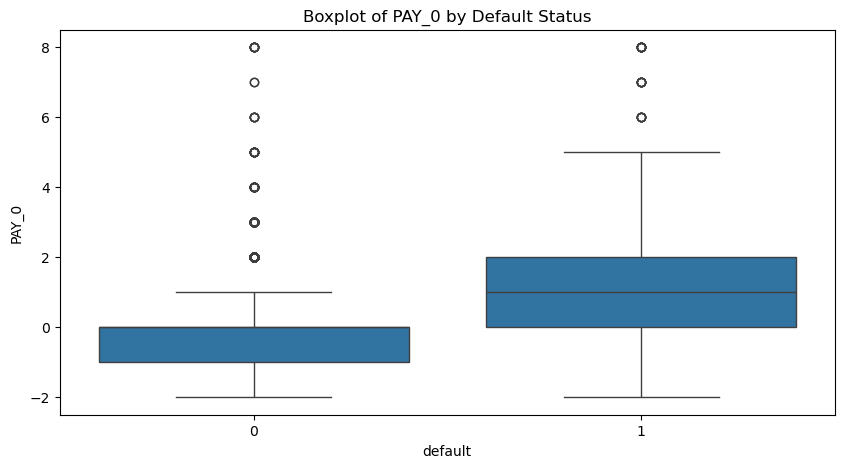

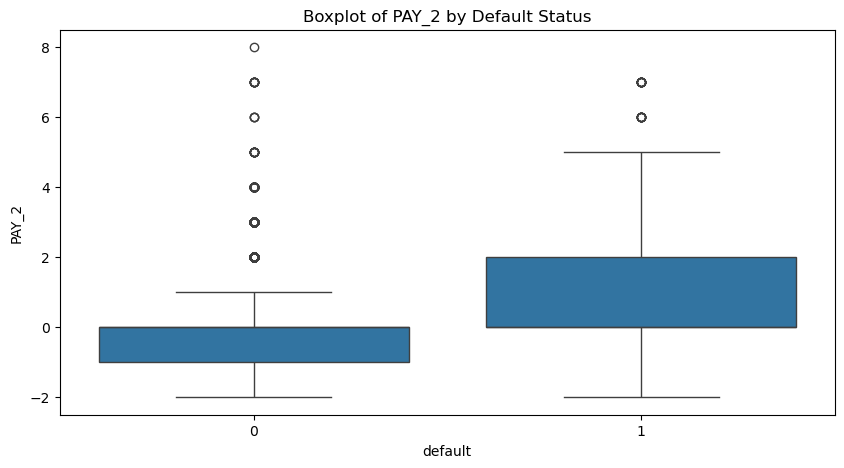

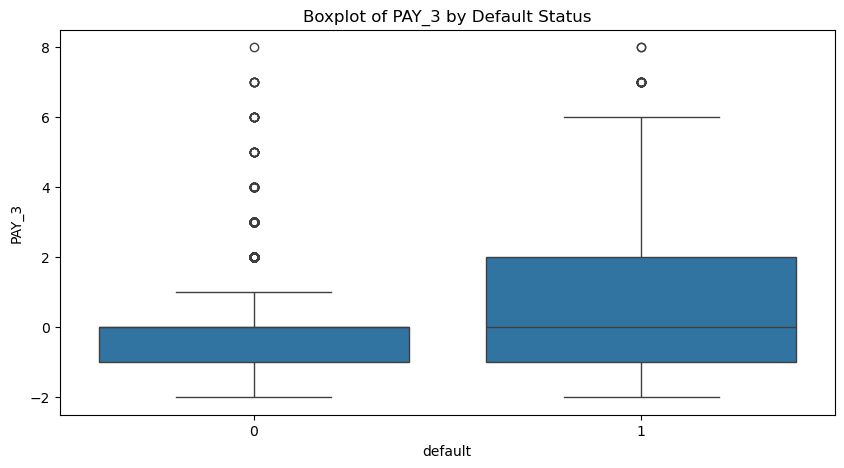

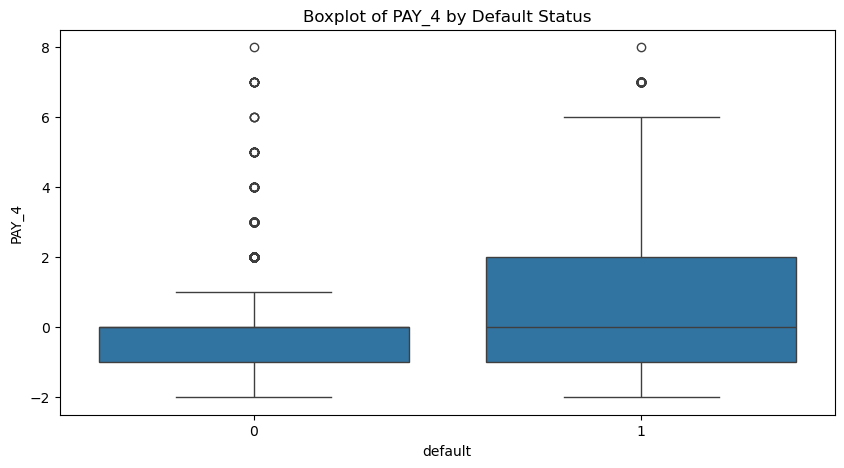

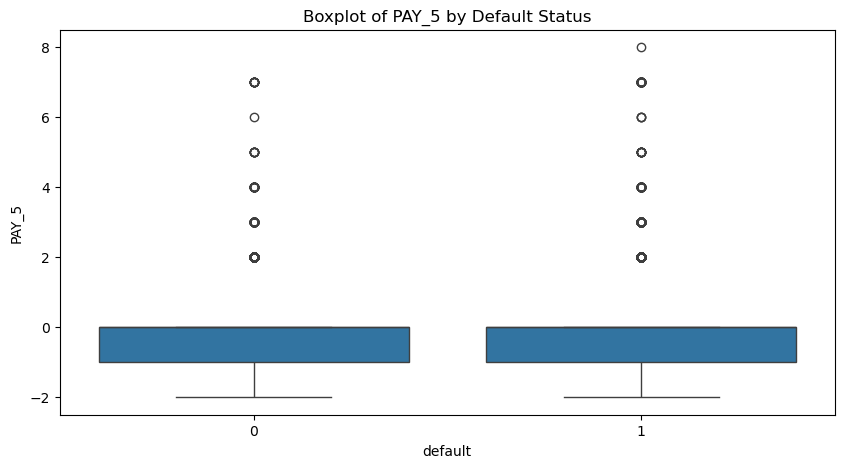

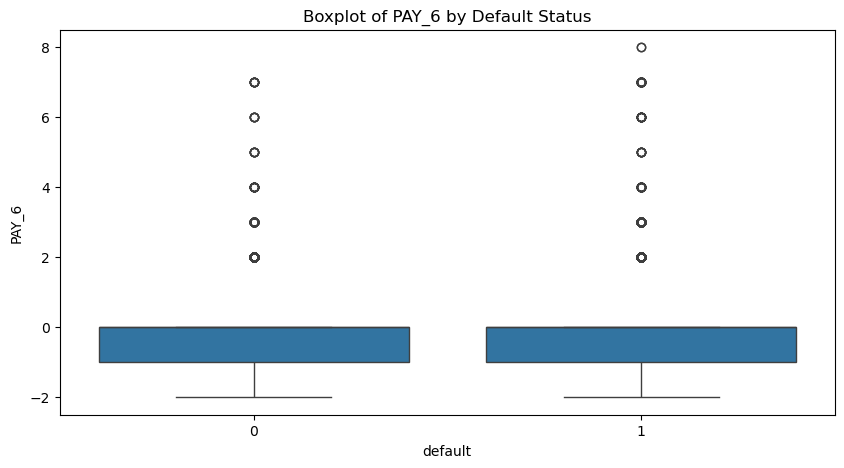

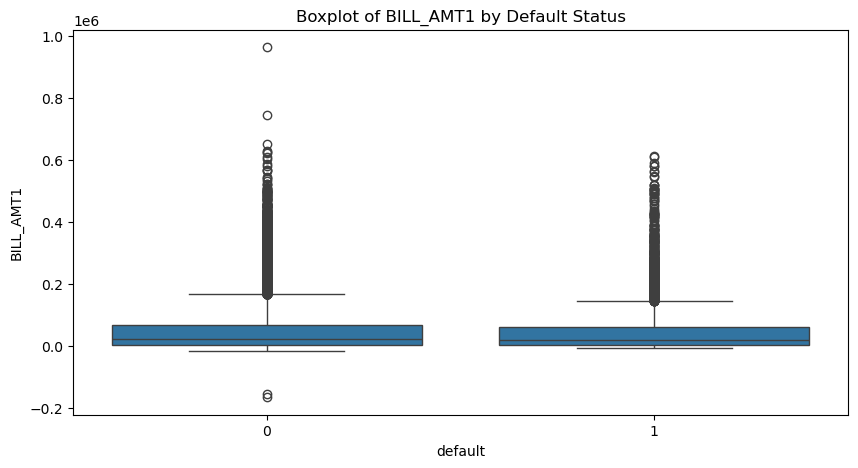

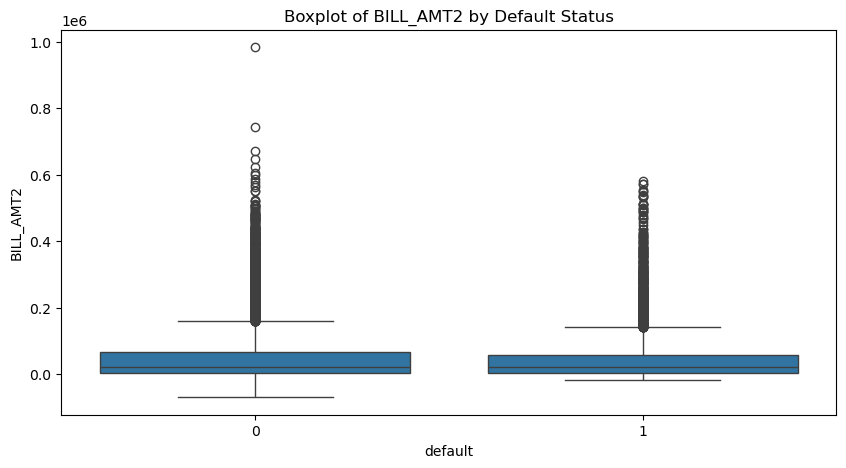

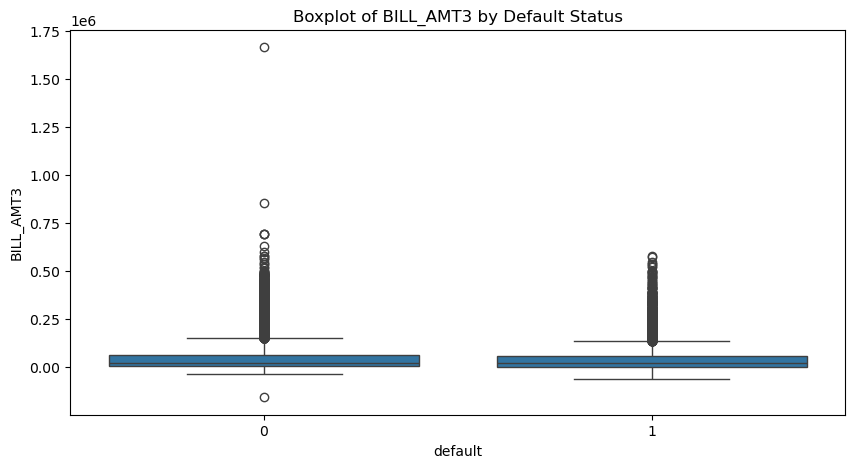

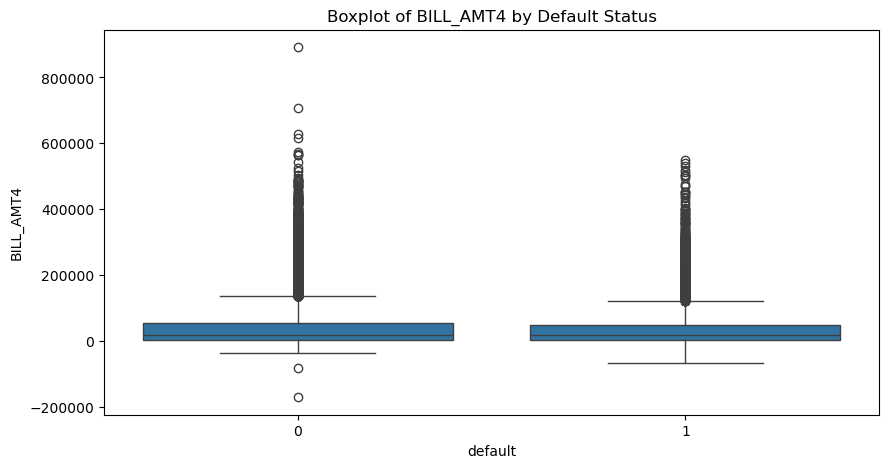

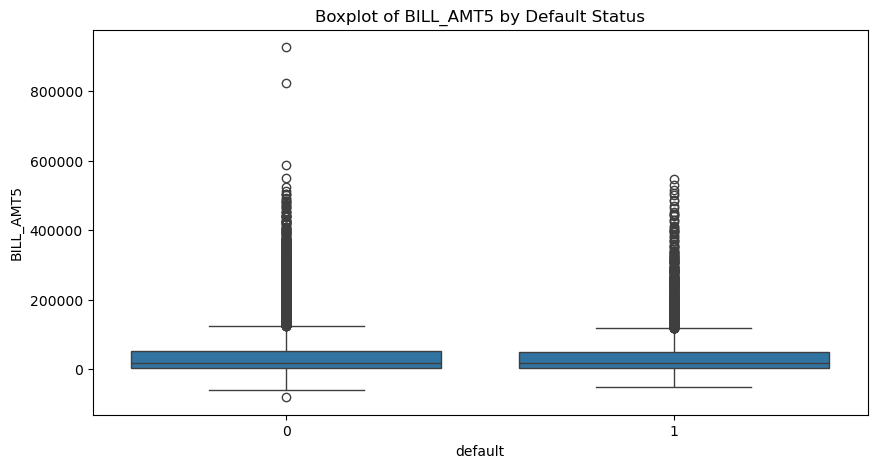

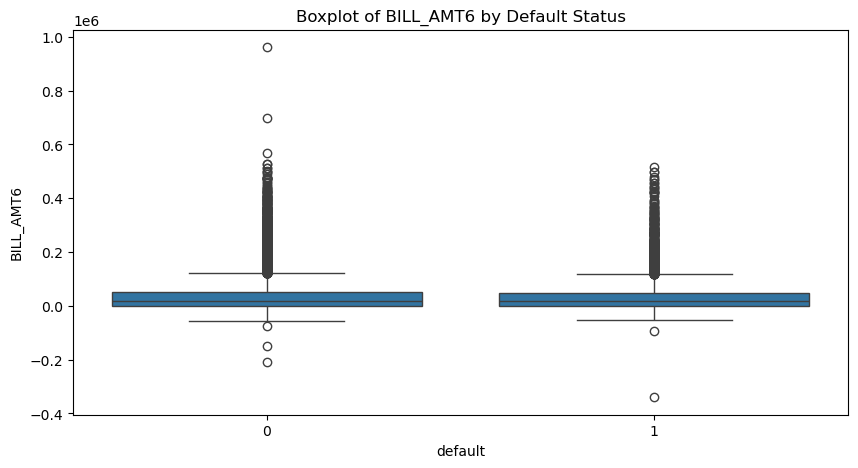

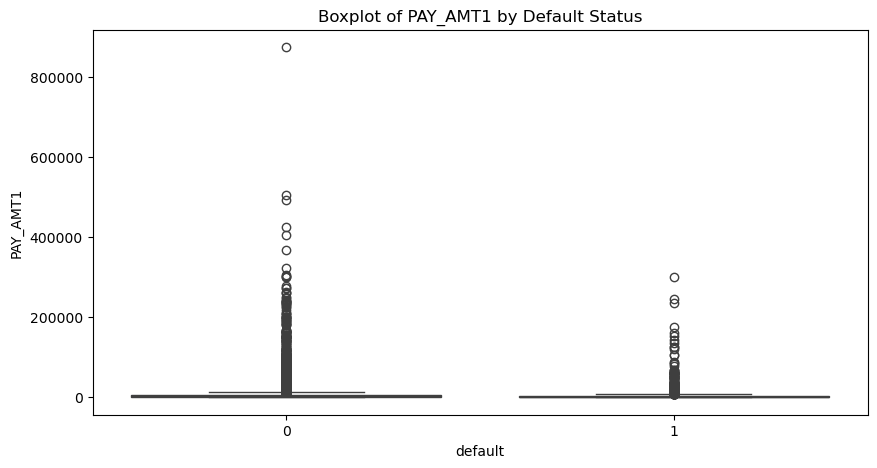

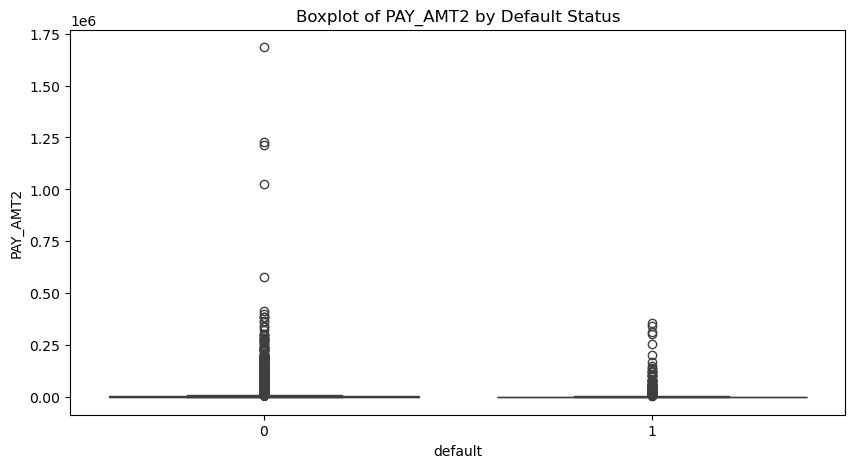

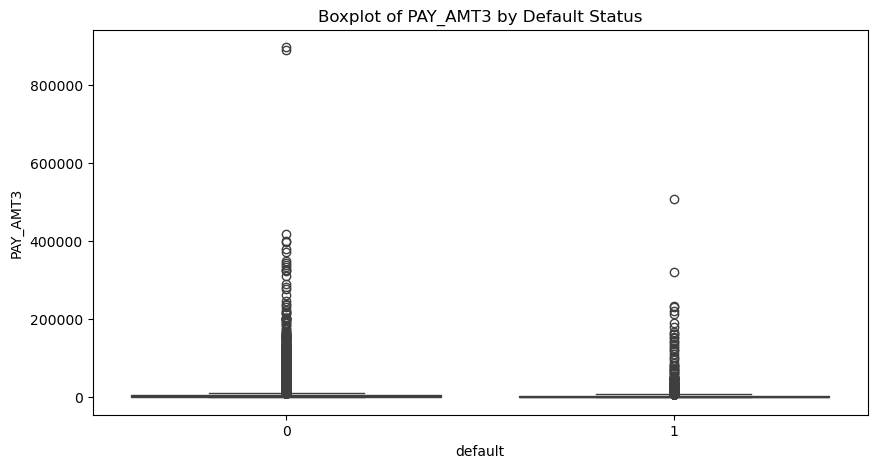

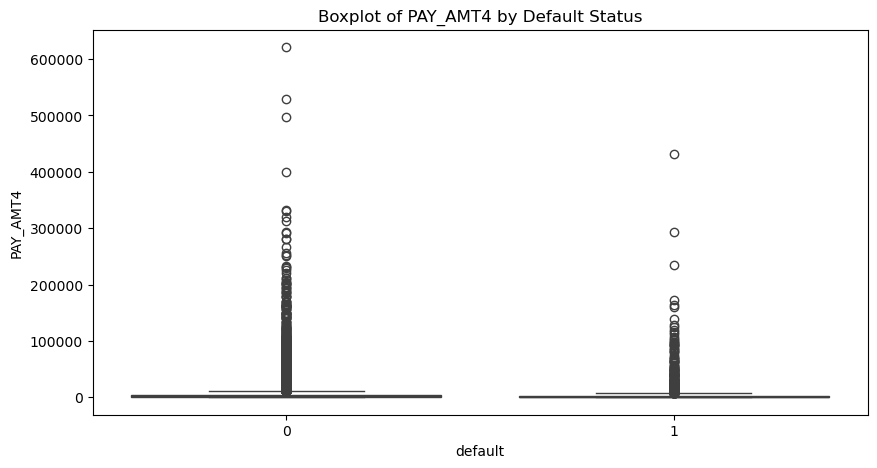

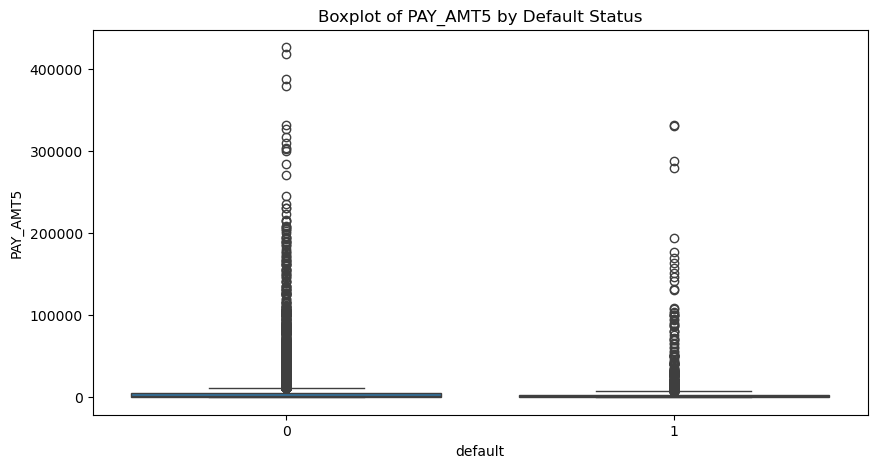

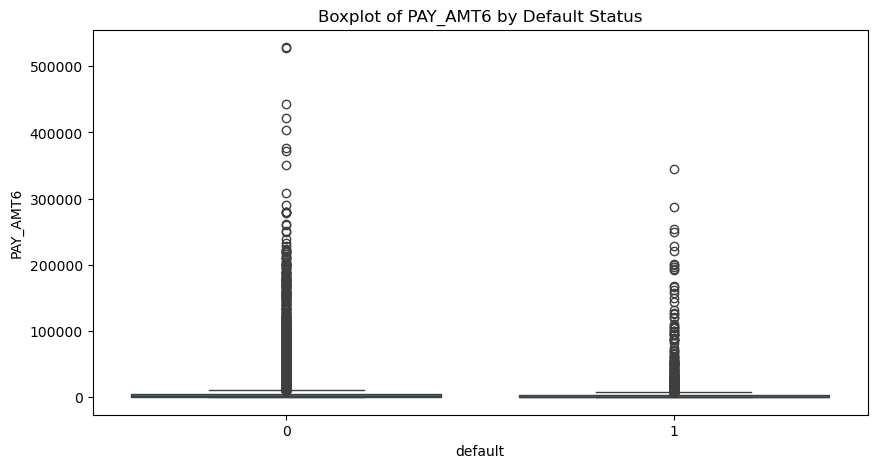

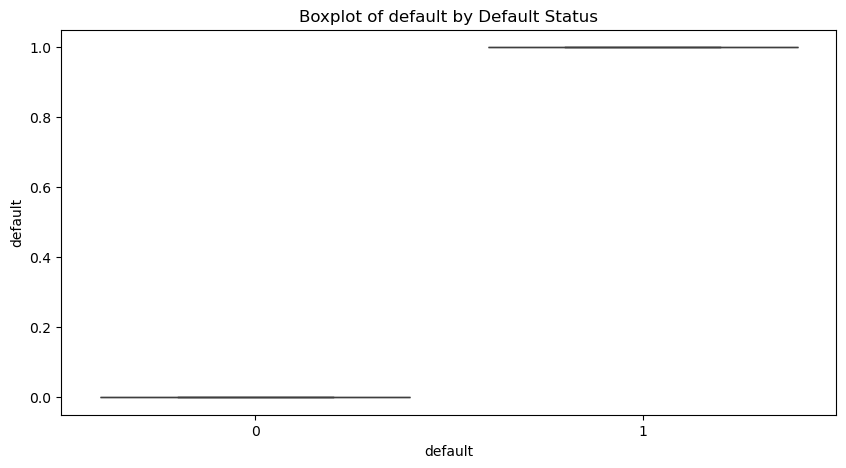

In [115]:
# Boxplots for outlier
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='default', y=col, data=df)
    plt.title(f'Boxplot of {col} by Default Status')
    plt.show()


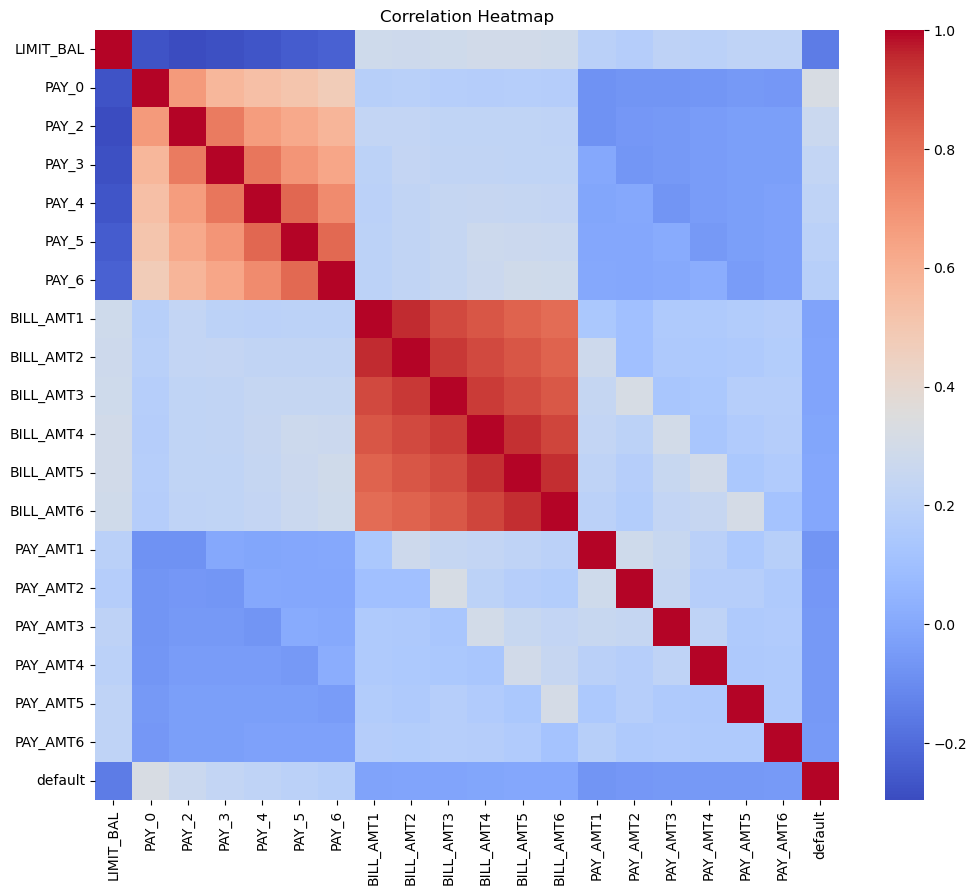

In [119]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [120]:
# value count for categorical features
for col in cat_cols:
    print(f'Value counts for {col}:')
    print(df[col].value_counts())
    print('\n')

Value counts for SEX:
SEX
F    18112
M    11888
Name: count, dtype: int64


Value counts for EDUCATION:
EDUCATION
University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: count, dtype: int64


Value counts for MARRIAGE:
MARRIAGE
Single     15964
Married    13659
Other        323
0             54
Name: count, dtype: int64




In [121]:
# checking cardinality of categorical features
for col in cat_cols:
    print(f'Number of unique values in {col}: {df[col].nunique()}')

Number of unique values in SEX: 2
Number of unique values in EDUCATION: 6
Number of unique values in MARRIAGE: 4


# 2.2 - Feature - Target Relationship

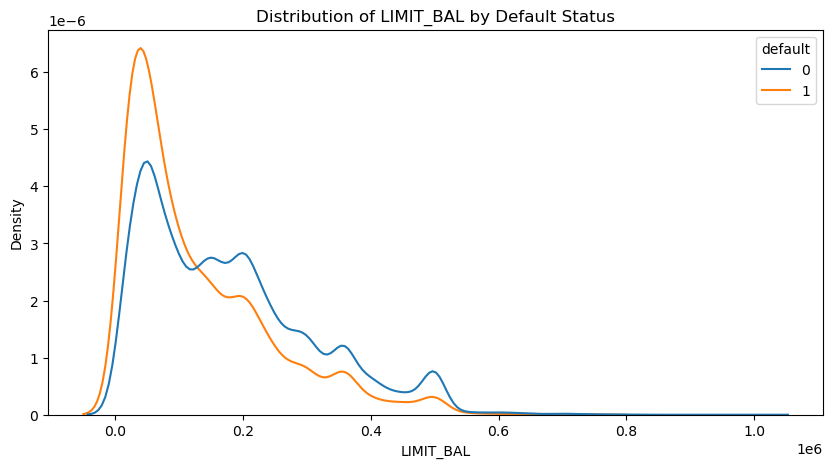

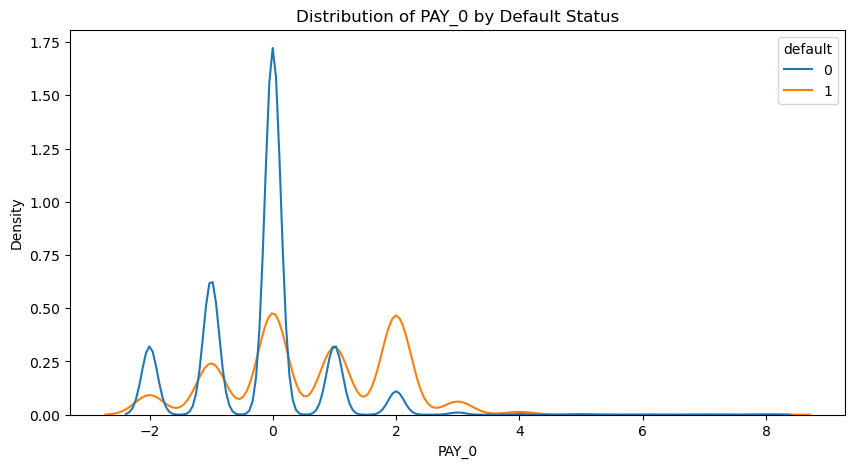

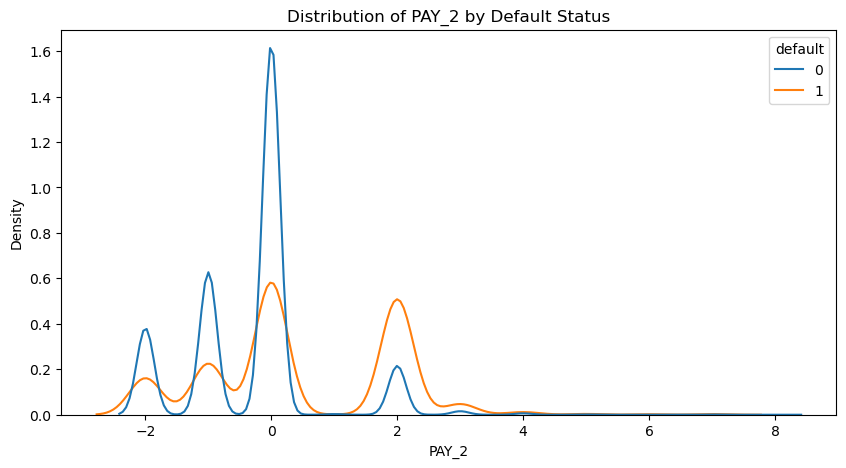

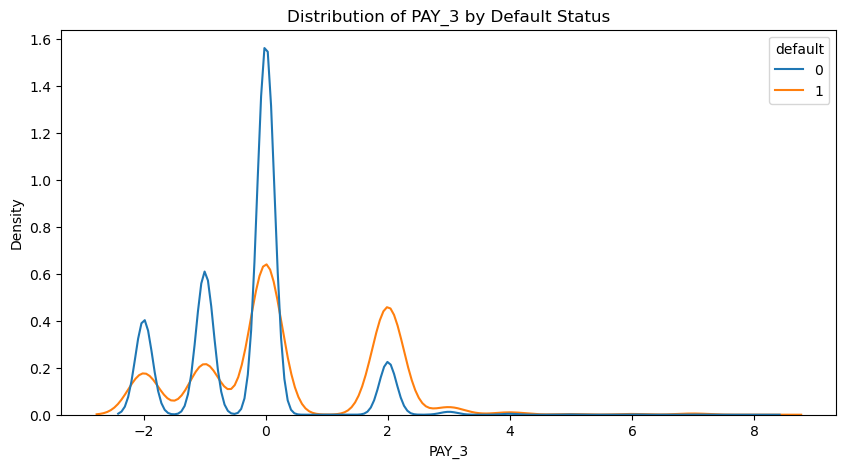

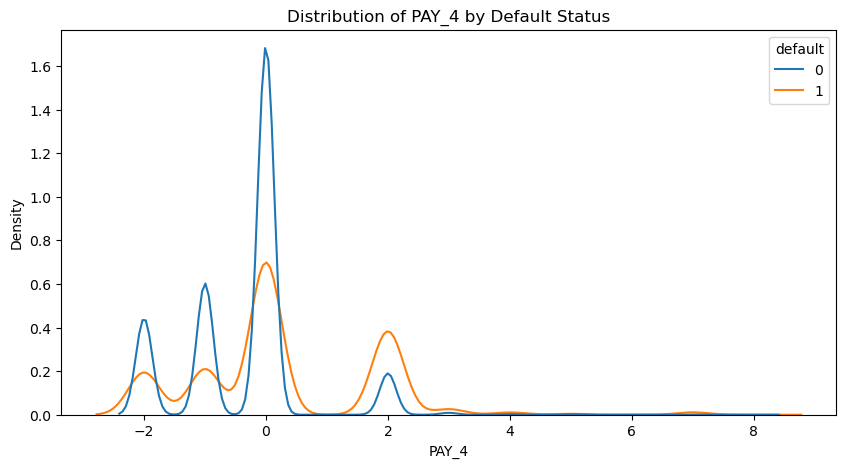

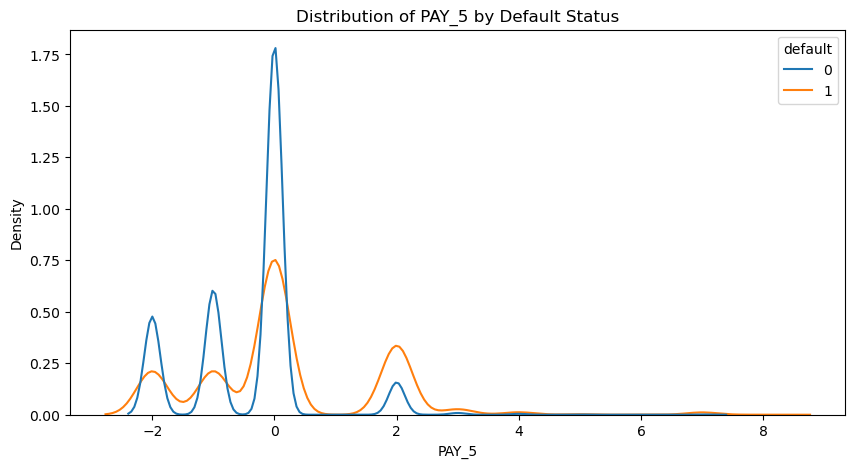

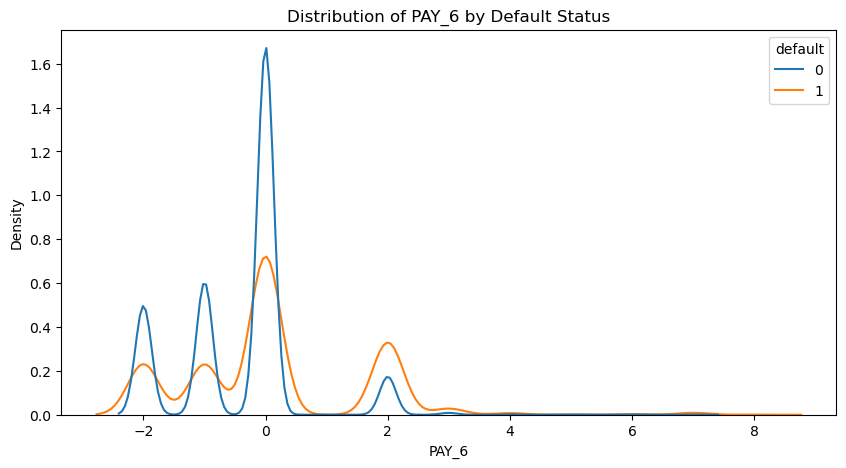

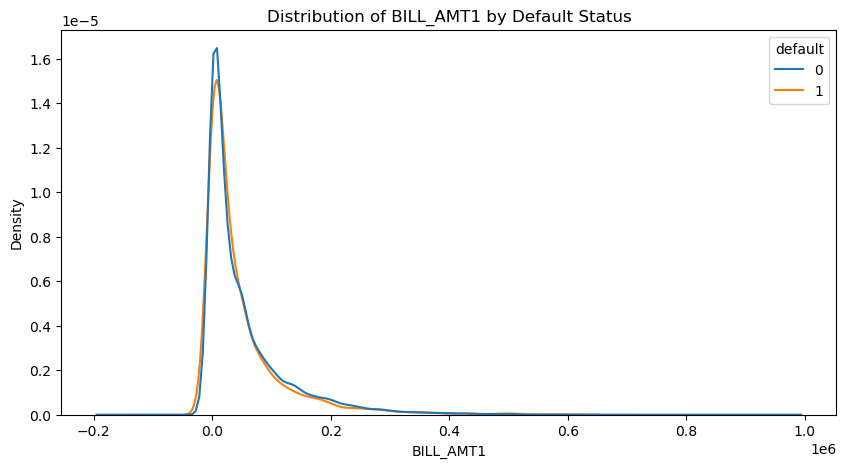

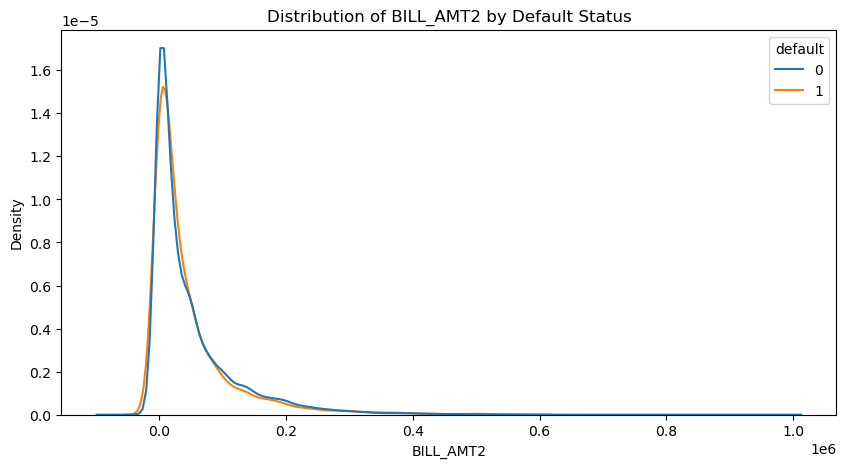

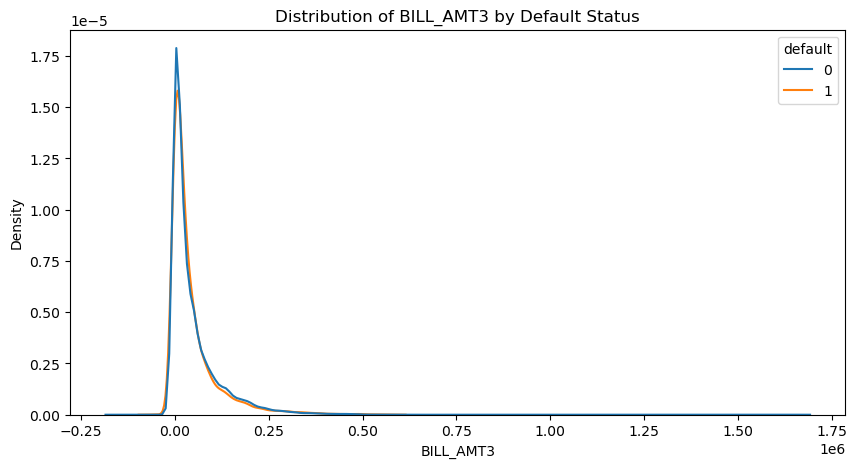

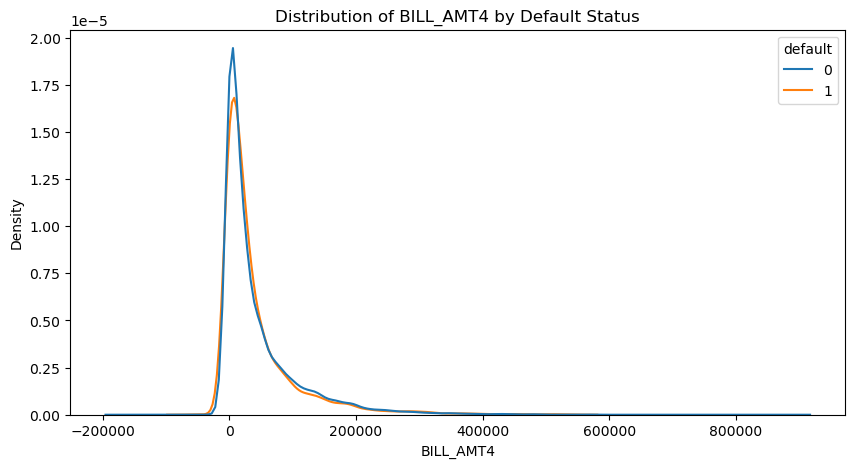

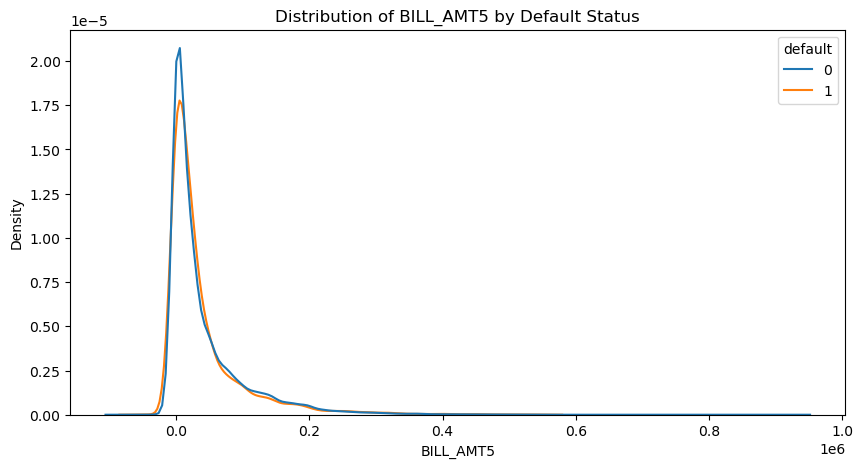

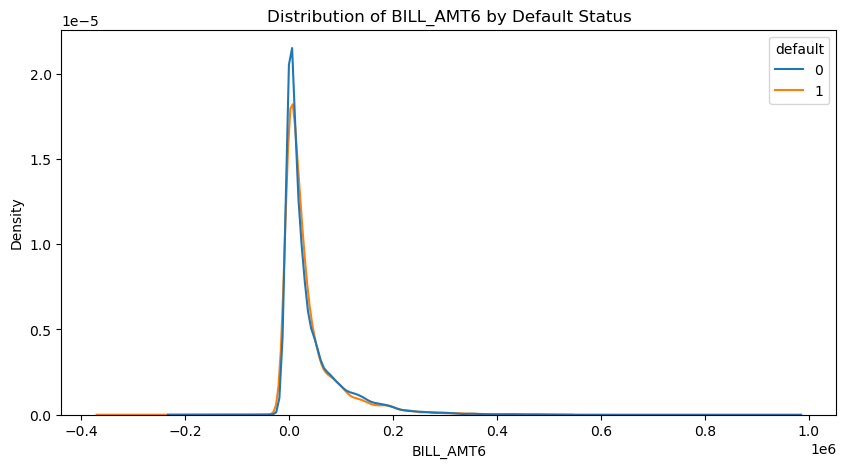

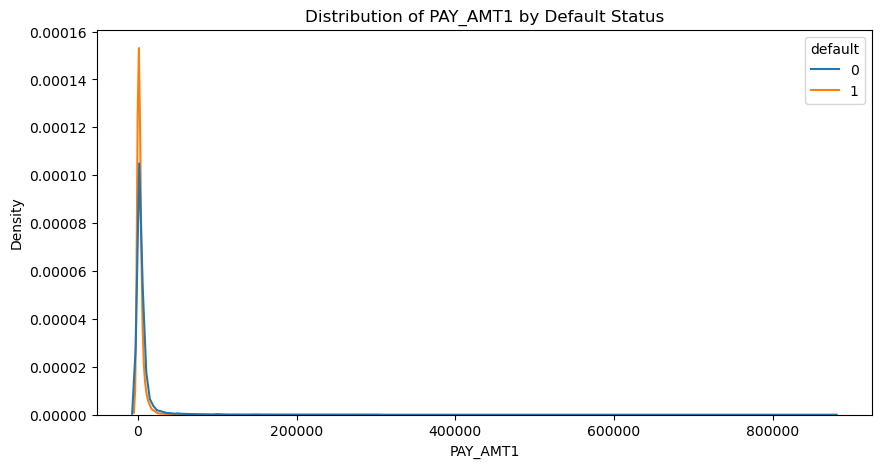

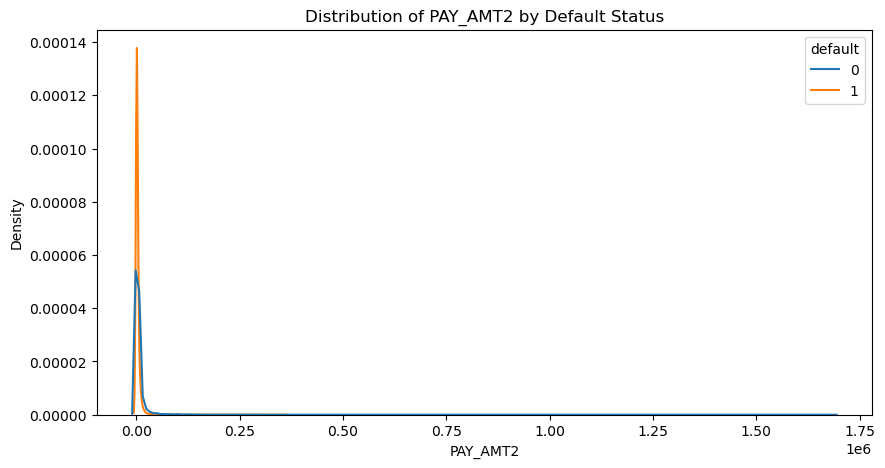

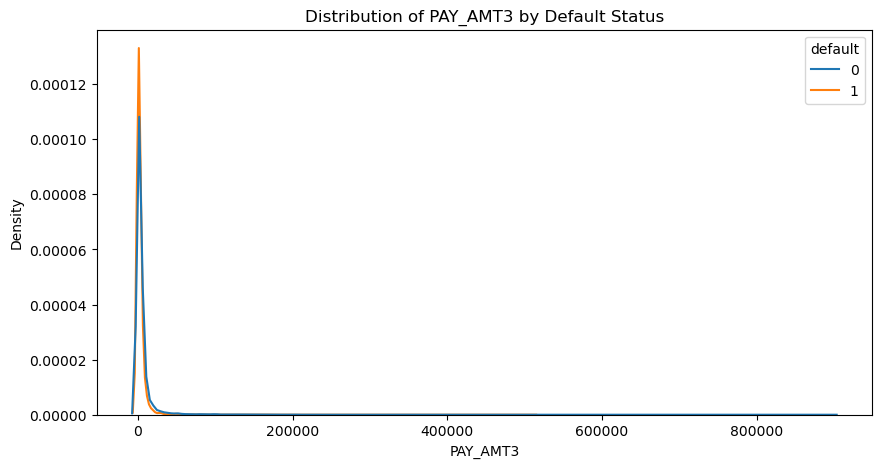

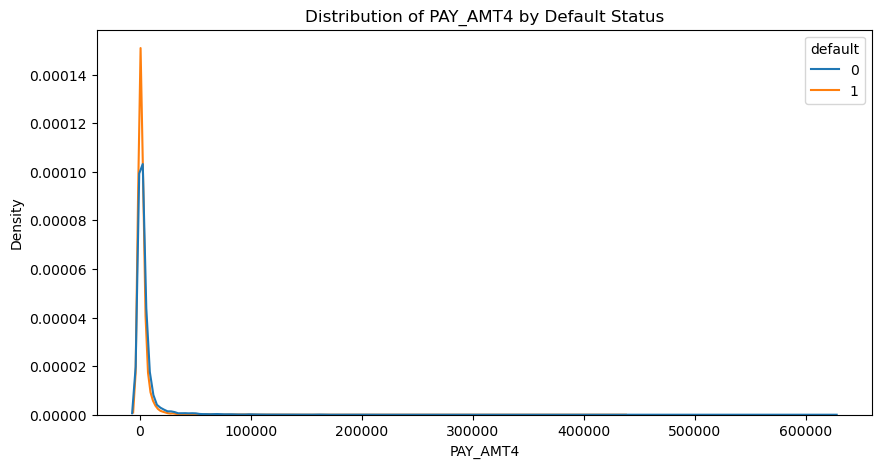

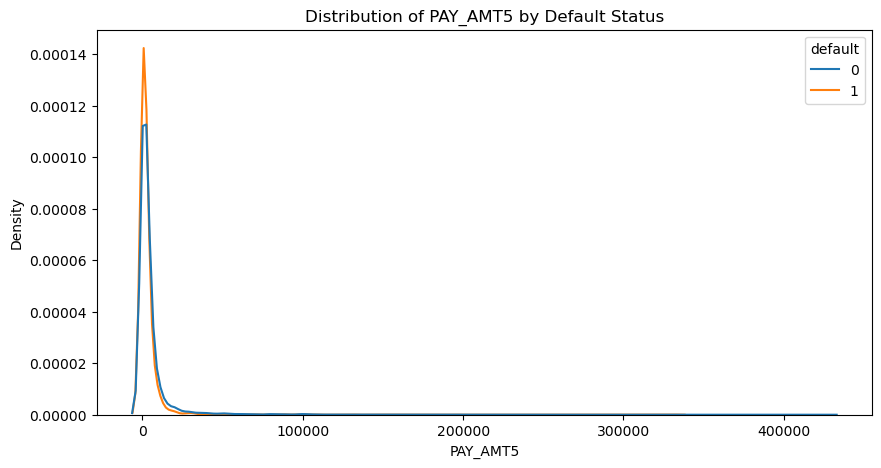

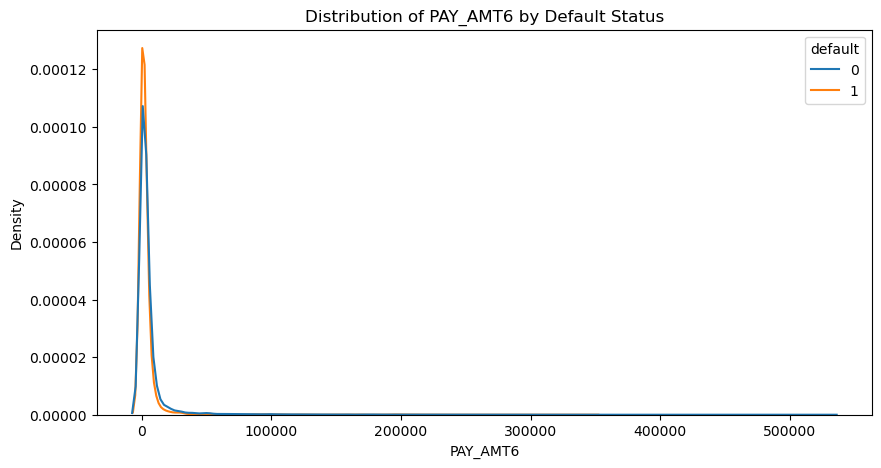

C:\Users\cjtor\AppData\Local\Temp\ipykernel_18628\1277834035.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='default', common_norm=False)


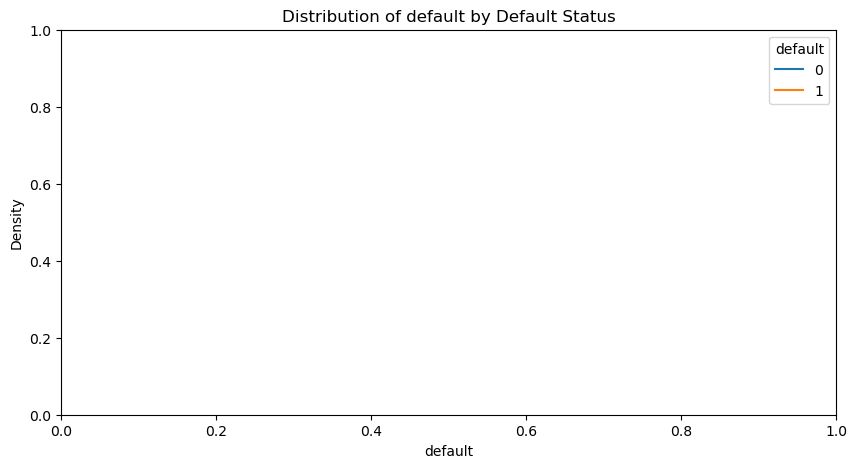

In [ ]:
# Numerical vs Target Analysis
# Plot distributions for default = 0 and default = 1
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x=col, hue='default', common_norm=False)
    plt.title(f'Distribution of {col} by Default Status')
    plt.show()

In [123]:
# Categorical vs Target Analysis
# Grouped default rate per category:
for col in cat_cols:
    print(df.groupby(col)['default'].mean())
    print('\n')

SEX
F    0.207763
M    0.241672
Name: default, dtype: float64


EDUCATION
0                  0.000000
Graduate school    0.192348
High School        0.251576
Others             0.056911
University         0.237349
Unknown            0.078550
Name: default, dtype: float64


MARRIAGE
0          0.092593
Married    0.234717
Other      0.260062
Single     0.209283
Name: default, dtype: float64




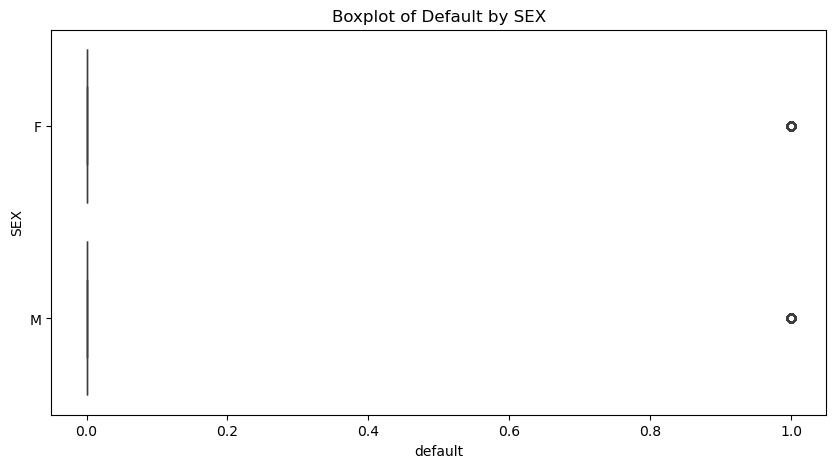

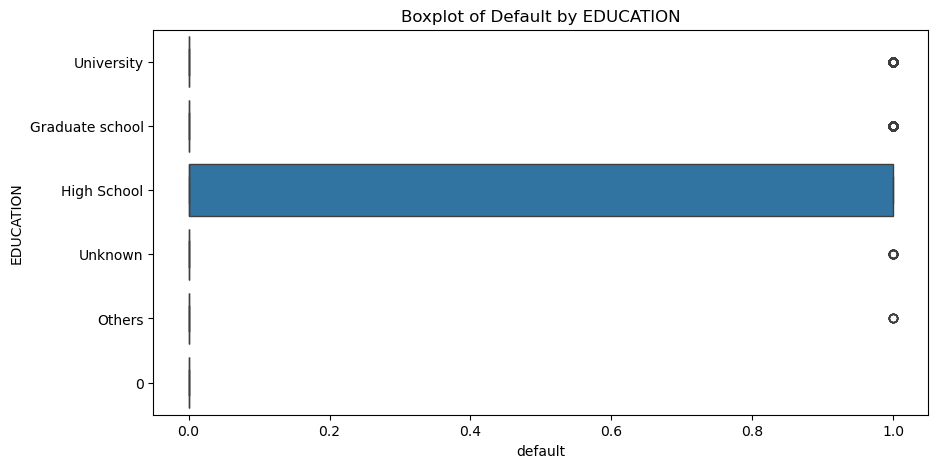

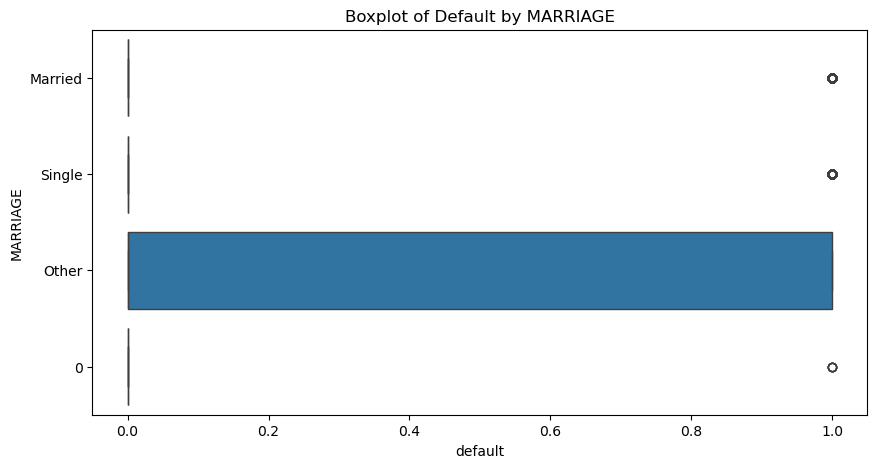

In [126]:
# Boxplots by class
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='default', y=col, data=df)
    plt.title(f'Boxplot of Default by {col}')
    plt.show()

In [130]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,default,SEX_M,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,1,False,False,False,False,True,False,True,False,False
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,1,False,False,False,False,True,False,False,False,True
2,90000,0,0,0,0,0,0,29239,14027,13559,...,0,False,False,False,False,True,False,False,False,True
3,50000,0,0,0,0,0,0,46990,48233,49291,...,0,False,False,False,False,True,False,True,False,False
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,0,True,False,False,False,True,False,True,False,False


In [135]:
# Feature importance using decision tree
from sklearn.tree import DecisionTreeClassifier

X = df_encoded.drop('default', axis=1)
y = df_encoded['default']

model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

PAY_0                        0.767184
PAY_2                        0.151489
PAY_AMT3                     0.048904
PAY_6                        0.017571
PAY_3                        0.011146
BILL_AMT1                    0.003707
LIMIT_BAL                    0.000000
EDUCATION_High School        0.000000
SEX_M                        0.000000
EDUCATION_Graduate school    0.000000
EDUCATION_Unknown            0.000000
EDUCATION_Others             0.000000
EDUCATION_University         0.000000
PAY_AMT5                     0.000000
MARRIAGE_Married             0.000000
MARRIAGE_Other               0.000000
PAY_AMT6                     0.000000
PAY_AMT2                     0.000000
PAY_AMT4                     0.000000
PAY_AMT1                     0.000000
BILL_AMT6                    0.000000
BILL_AMT5                    0.000000
BILL_AMT4                    0.000000
BILL_AMT3                    0.000000
BILL_AMT2                    0.000000
PAY_5                        0.000000
PAY_4       

# Section 3 - Feature preprocessing + Feature Engineering + Baseline Models